In [116]:
#Importing needed modules .
from os import listdir , mkdir 
import matplotlib.pyplot as plt
from shutil import copyfile , rmtree
from random import sample
from tensorflow.keras import layers , models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#Instancing from "ImageDataGenerator" object .
gen = ImageDataGenerator(rescale=1/255)

In [117]:
#preparing base folders for generate by a function .
def mk_paths(base_path)->tuple:
    '''function docstring'''
    if 'ready_to_gen' in listdir(base_path) :
        rmtree(f'{base_path}\\ready_to_gen')
    mkdir(f'{base_path}\\ready_to_gen')
    mkdir(f'{base_path}\\ready_to_gen\\train')
    mkdir(f'{base_path}\\ready_to_gen\\train\\Hemorrhagic')
    mkdir(f'{base_path}\\ready_to_gen\\train\\Normal')
    mkdir(f'{base_path}\\ready_to_gen\\valid')
    mkdir(f'{base_path}\\ready_to_gen\\valid\\Normal')
    mkdir(f'{base_path}\\ready_to_gen\\valid\\Hemorrhagic')
    return f'{base_path}\\ready_to_gen\\train',f'{base_path}\\ready_to_gen\\valid',f'{base_path}\\ready_to_gen\\train\\Hemorrhagic' , f'{base_path}\\ready_to_gen\\train\\Normal',f'{base_path}\\ready_to_gen\\valid\\Hemorrhagic',f'{base_path}\\ready_to_gen\\valid\\Normal'


base_dir = "D:\\datasets\\Brain_CT"
training , validation , train_hemo , train_nor , valid_hemo , valid_nor = mk_paths(base_dir)

In [118]:
#Making a function to split photos to train and valid sets .
def split_data(photos_path,split_size , folder_name = None)->None:
    '''function docstring'''
    split_number = (split_size*len(listdir(photos_path)))//100
    selected_photos = sample(listdir(photos_path),split_number)
    for pic in listdir(photos_path) :
        if pic in selected_photos :
            if folder_name == 'Hemorrhagic' : 
                copyfile(f'{photos_path}\\{pic}',f'{train_hemo}\\{pic}')
            else :
                copyfile(f'{photos_path}\\{pic}',f'{train_nor}\\{pic}')
        else :
            if folder_name == 'Hemorrhagic' : 
                copyfile(f'{photos_path}\\{pic}',f'{valid_hemo}\\{pic}')
            else :
                copyfile(f'{photos_path}\\{pic}',f'{valid_nor}\\{pic}')

In [119]:
#splitting photos to train and valid .
size = int(input('Enter train size :'))
print('Hemorrhagic Ct scans are spliting ...')
for folder in listdir("D:\\datasets\\Brain_CT\\Data\\Hemorrhagic\\KANAMA") :
    f_name = 'Hemorrhagic'
    split_data(f'D:\\datasets\\Brain_CT\\Data\\Hemorrhagic\\KANAMA\\{folder}' , size , f_name)
print('Hemorrhagic Ct scans have splited succesfully .')
print('--------------------------------------------------')
print('Normal Ct scans are splitting ...')
for folder in listdir("D:\\datasets\\Brain_CT\\Data\\NORMAL") :
    f_name = 'Normal'
    split_data(f'D:\\datasets\\Brain_CT\\Data\\NORMAL\\{folder}' , size , f_name)
print('Normal Ct scans have splited succesfully .')

Enter train size :90
Hemorrhagic Ct scans are spliting ...
Hemorrhagic Ct scans have splited succesfully .
--------------------------------------------------
Normal Ct scans are splitting ...
Normal Ct scans have splited succesfully .


In [120]:
#Generating photos .
ready_train = gen.flow_from_directory(training,target_size=(150,150),batch_size=60,class_mode='binary',color_mode='grayscale')
ready_valid = gen.flow_from_directory(validation,target_size=(150,150),batch_size=14,class_mode='binary',color_mode='grayscale')

Found 6093 images belonging to 2 classes.
Found 701 images belonging to 2 classes.


In [121]:
#Creating a model by function .
def Create_model()->None :
    '''function docstring'''
    model = models.Sequential([layers.Flatten(),
                              layers.Dense(16,activation='relu',input_shape=(150,150,1)),
                              layers.Dense(1,activation='sigmoid')])
    model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
    return model

In [122]:
#Data training .
history = Create_model().fit(ready_train,epochs=10,validation_data=ready_valid)

Epoch 1/10
102/102 [==============================] - 35s 338ms/step - loss: 0.5966 - accuracy: 0.7747 - val_loss: 0.2741 - val_accuracy: 0.8474
Epoch 2/10
102/102 [==============================] - 13s 124ms/step - loss: 0.1771 - accuracy: 0.9324 - val_loss: 0.0799 - val_accuracy: 0.9700
Epoch 3/10
102/102 [==============================] - 13s 123ms/step - loss: 0.1096 - accuracy: 0.9593 - val_loss: 0.0341 - val_accuracy: 0.9957
Epoch 4/10
102/102 [==============================] - 12s 121ms/step - loss: 0.0741 - accuracy: 0.9778 - val_loss: 0.0246 - val_accuracy: 0.9929
Epoch 5/10
102/102 [==============================] - 13s 126ms/step - loss: 0.0449 - accuracy: 0.9874 - val_loss: 0.0122 - val_accuracy: 0.9986
Epoch 6/10
102/102 [==============================] - 13s 124ms/step - loss: 0.0464 - accuracy: 0.9860 - val_loss: 0.0076 - val_accuracy: 1.0000
Epoch 7/10
102/102 [==============================] - 13s 124ms/step - loss: 0.0303 - accuracy: 0.9918 - val_loss: 0.0073 - val_ac

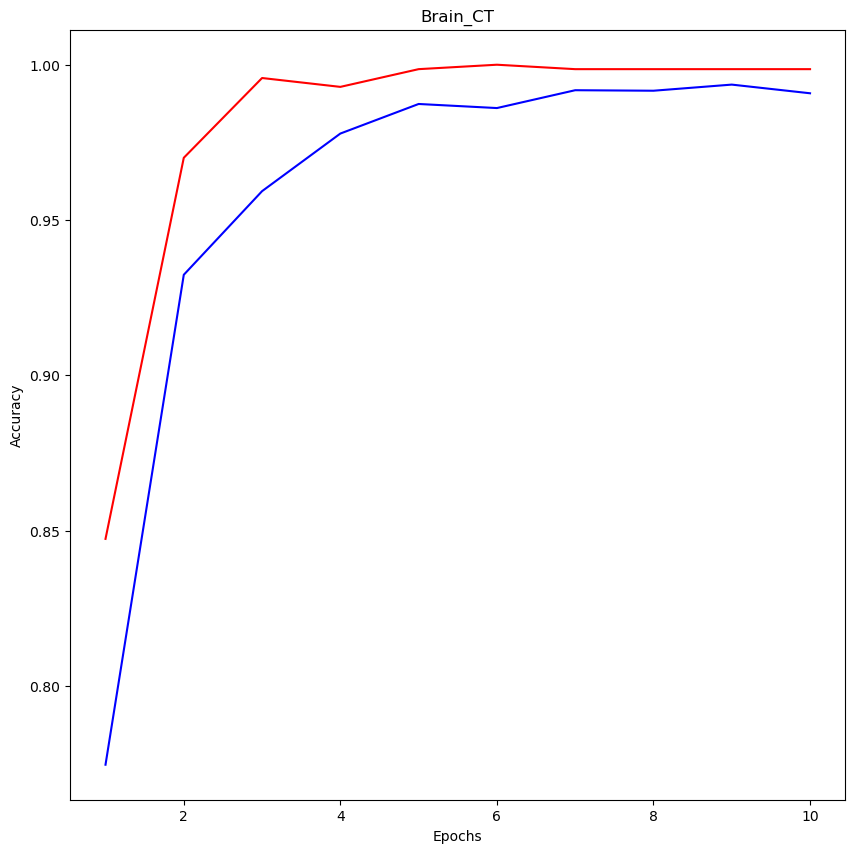

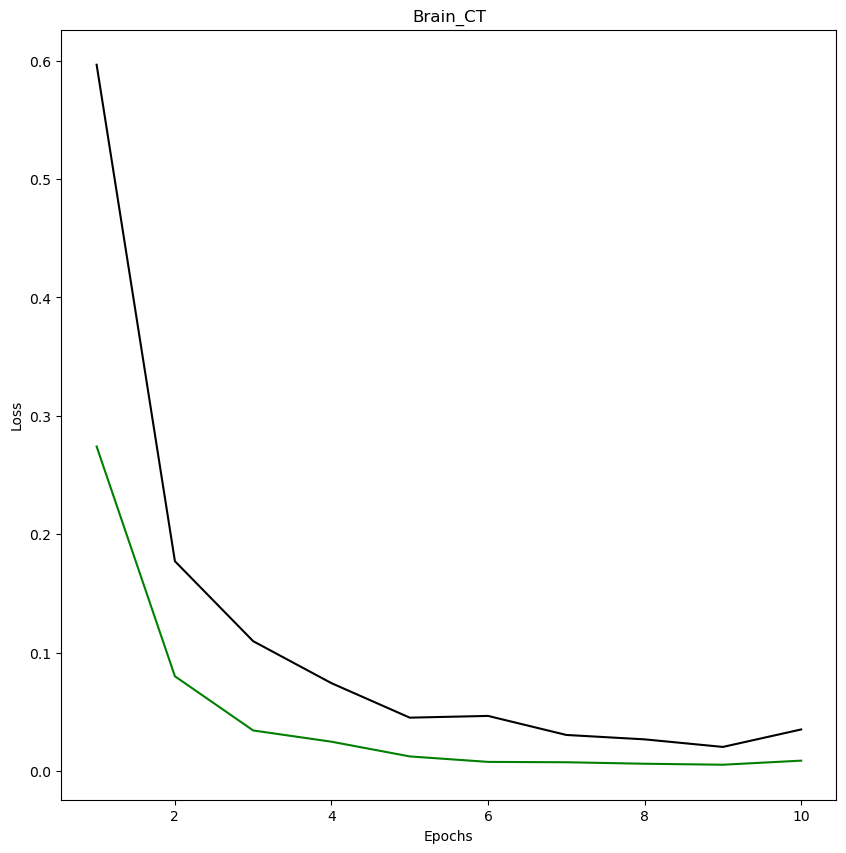

In [125]:
#Visualize models performance
epoch = range(1,11)
results = history.history
plt.figure(figsize=(10,10))
plt.plot(epoch,results['accuracy'],'blue')
plt.plot(epoch,results['val_accuracy'],'red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Brain_CT')
plt.show()
plt.figure(figsize=(10,10))
plt.plot(epoch,results['loss'],'black')
plt.plot(epoch,results['val_loss'],'green')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Brain_CT')
plt.show()